# Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

C:\Users\Utkarsh Sah\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [3]:
data = pd.read_csv('cancer.txt', header=None)

In [4]:
data.replace('?', 0, inplace=True)
data = data.astype(float)

In [5]:
targets = data[10].replace(2,1).replace(4,0)
data.drop([0,10], axis=1, inplace=True)

In [6]:
data.head()

,1,2,3,4,5,6,7,8,9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [7]:
train, test, targets_train, targets_test = train_test_split(data, targets, test_size=0.1, random_state=0)

In [8]:
train.shape, test.shape

((629, 9), (70, 9))

# K-Means Implementation

In [9]:
class KMeans():
    def __init__(self, n_clusters, max_iter=100, tol=0.001):
        np.random.seed(0)
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.sse = np.inf
        self.scaler = StandardScaler()
    def fit(self, train, verbose=False):
        self.n_samples = train.shape[0]
        self.n_features = train.shape[1]
        self.centroids = np.random.normal(size=(self.n_clusters, train.shape[1]))
        train = self.scaler.fit_transform(train)
        for _ in range(self.max_iter):
            centroids = np.tile(self.centroids, (self.n_samples, 1))
            samples = np.repeat(train, self.n_clusters, axis=0)
            l2_norm = np.linalg.norm(centroids-samples, axis=1).reshape(self.n_samples, self.n_clusters)
            self.labels = np.argmin(l2_norm, axis=1)
            self.data = pd.DataFrame(train)
            self.data['Label'] = self.labels
            sse = 0
            for index in range(self.n_clusters):
                cluster = self.data[self.data['Label'] == index].drop('Label', axis=1).values
                if (cluster.shape[0] == 0):
                    continue
                self.centroids[index] = cluster.mean(axis=0)
                sse += np.linalg.norm(cluster-self.centroids[index], axis=1).sum()
            if (verbose):
                print("SSE: ", sse)
            if (self.sse - sse > self.tol):
                self.sse = sse
            else:
                break
    def predict(self, test):
        test = self.scaler.transform(test)
        centroids = np.tile(self.centroids, (test.shape[0], 1))
        samples = np.repeat(test, self.n_clusters, axis=0)
        l2_norm = np.linalg.norm(centroids-samples, axis=1).reshape(test.shape[0], self.n_clusters)
        predictions = np.argmin(l2_norm, axis=1)
        return predictions

In [10]:
model = KMeans(2)
model.fit(train, verbose=True)

SSE:  1543.40427748
SSE:  1124.37782538
SSE:  1039.91328558
SSE:  1018.07182978
SSE:  1015.79696968
SSE:  1014.66381397
SSE:  1014.66381397


In [11]:
model.sse

1014.663813974262

In [12]:
predictions = model.predict(test)
predictions

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0], dtype=int64)

In [13]:
accuracy_score(targets_test, predictions)

0.94285714285714284

# Elbow Method

Procedure for determining the optimum number of clusters required

In [14]:
n_clusters = np.arange(1,10)
sse = []

In [15]:
for n in n_clusters:
    model = KMeans(n)
    model.fit(train)
    sse.append(model.sse)

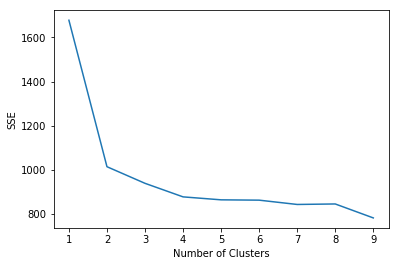

In [16]:
plt.plot(n_clusters, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')